# Introduction to Statistical Learning

I shall be completing the applied exercises from Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani in these Jupyter Notebooks

# Chapter 2 What is Statistical Learning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.width = 0


#a slightly nicer style of graph

plt.style.use('seaborn')


#loading in the dataset

df = pd.read_csv('Datasets/college.csv')

print(df.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [2]:
print(df.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

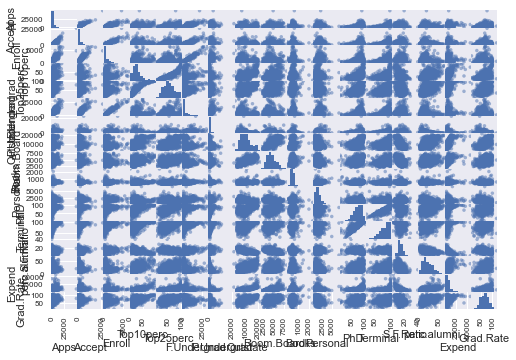

In [3]:
pd.plotting.scatter_matrix(df) #adjust size parameter accordingly
#pandas does not have a plotting library. 
#so using matplotlib to plot the scattermatrix
#alternatively this could be more neatly done in seaborn
plt.show() 

Text(0.5, 1.0, 'Notprivate')

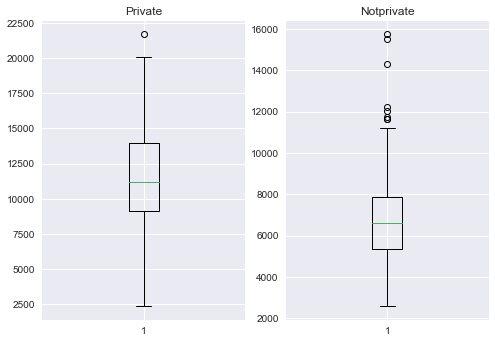

In [35]:
#a more efficient cell here would have probably used groupby

yespriv = df[df['Private']== 'Yes']
nopriv = df[df['Private'] == 'No']

# pyplot is stateful - it has a certain state that is changed, almost like an object. 
#In that state, there are a few features including figure and axes. 
#figure is the container of the graphs, the axes are the actual plots.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.boxplot(yespriv['Outstate'])
ax1.set_title('Private')
ax2.boxplot(nopriv['Outstate'])
ax2.set_title('Notprivate')

In [32]:
#here we are categorising the top

def elitefunc(perc):
    if perc > 50:
        return 1
    return 0

df['Elite'] = df['Top10perc'].apply(elitefunc)

print(df['Elite'].value_counts())


0    699
1     78
Name: Elite, dtype: int64


Text(0.5, 1.0, 'Non-Elite')

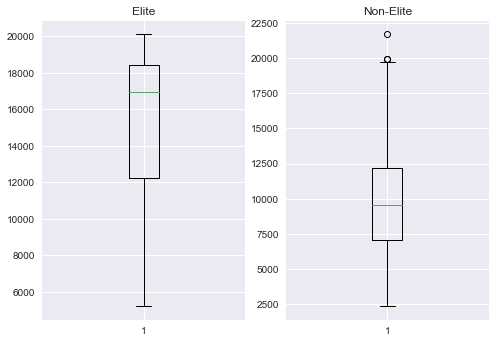

In [37]:
yeselite = df[df['Elite']== 1]
noelite = df[df['Elite'] == 0]

# pyplot is stateful - it has a certain state that is changed, almost like an object. 
#In that state, there are a few features including figure and axes. 
#figure is the container of the graphs, the axes are the actual plots.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.boxplot(yeselite['Outstate'])
ax1.set_title('Elite')
ax2.boxplot(noelite['Outstate'])
ax2.set_title('Non-Elite')

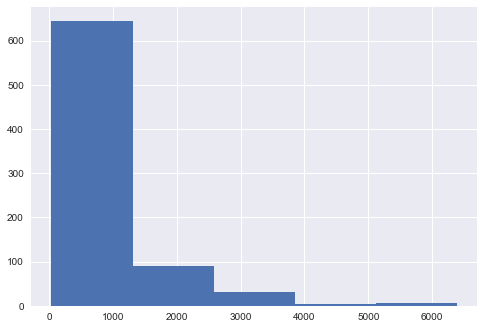

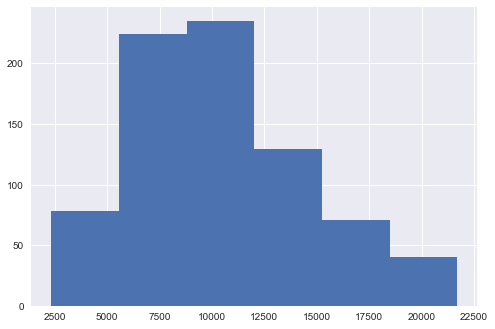

In [75]:
#Creating bins for data and then creating a histogram

plt.hist(df['Enroll'], bins=5)

plt.show()

plt.hist(df['Outstate'], bins=6)

plt.show()

#unsuccessful attempt at creating bins with pd.cut which could have given more control over bin sizes instead of uniformly 
#splitting data

#bins = pd.qcut(df['Enroll'], 4, right=False)
#print(bins)
#for x in bins:
#    bins[x] = x.round()
#plt.hist(df['Enroll'], bins=bins)

In [79]:
df = pd.read_csv('Datasets\Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [104]:
quantitative = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']

#there appears to be an unknown issue with horsepower. it seems that not every value is a float. unexplained & unresolved issue.

def fixhorsepower(value):
    try:
        return float(value)
    except:
        return np.nan
    
df['horsepower'].apply(fixhorsepower)

df = df[df['horsepower'].notna()]

print(df.describe())



for x in quantitative: 
    print(f"The range and sd of {x} are {float(df[x].max()) - float(df[x].min())} and {df[x].std()} respectively")
    
    
df.drop([9,84])

              mpg   cylinders  displacement       weight  acceleration  \
count  397.000000  397.000000    397.000000   397.000000    397.000000   
mean    23.515869    5.458438    193.532746  2970.261965     15.555668   
std      7.825804    1.701577    104.379583   847.904119      2.749995   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.000000  2223.000000     13.800000   
50%     23.000000    4.000000    146.000000  2800.000000     15.500000   
75%     29.000000    8.000000    262.000000  3609.000000     17.100000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

             year      origin  
count  397.000000  397.000000  
mean    75.994962    1.574307  
std      3.690005    0.802549  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
The range and sd of mpg are 37.6 and 7.825803

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


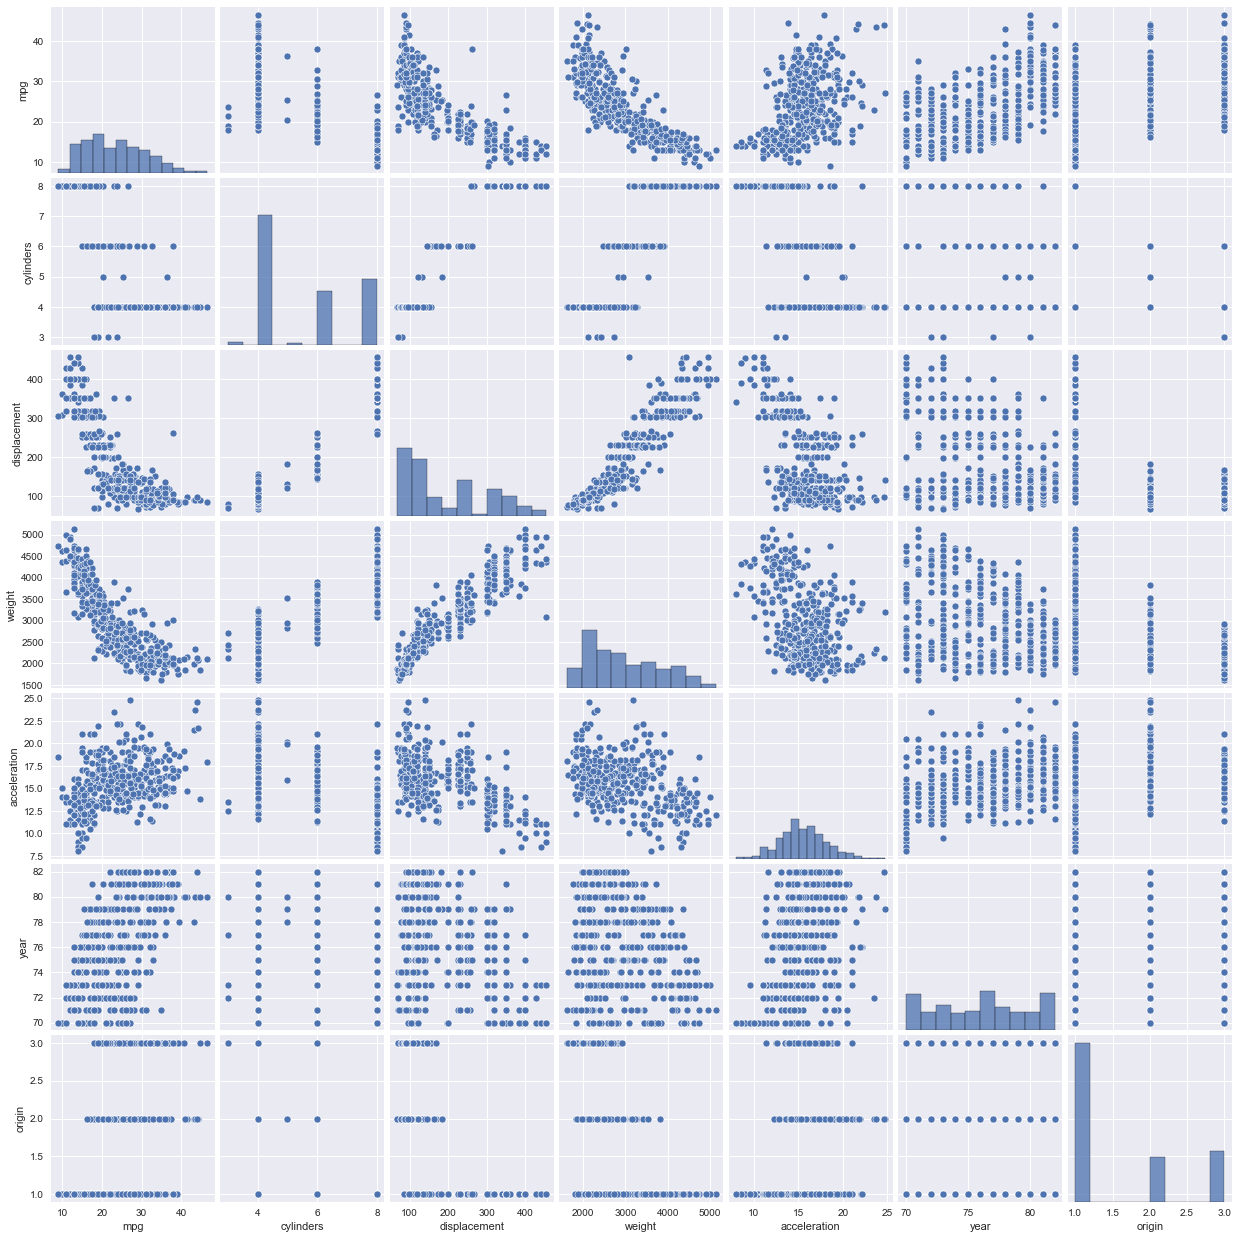

In [105]:
import seaborn as sns

#a bit nicer looking and efficent than the matplotlib pairplot

sns.pairplot(df)

<bound method NDFrame.head of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax 

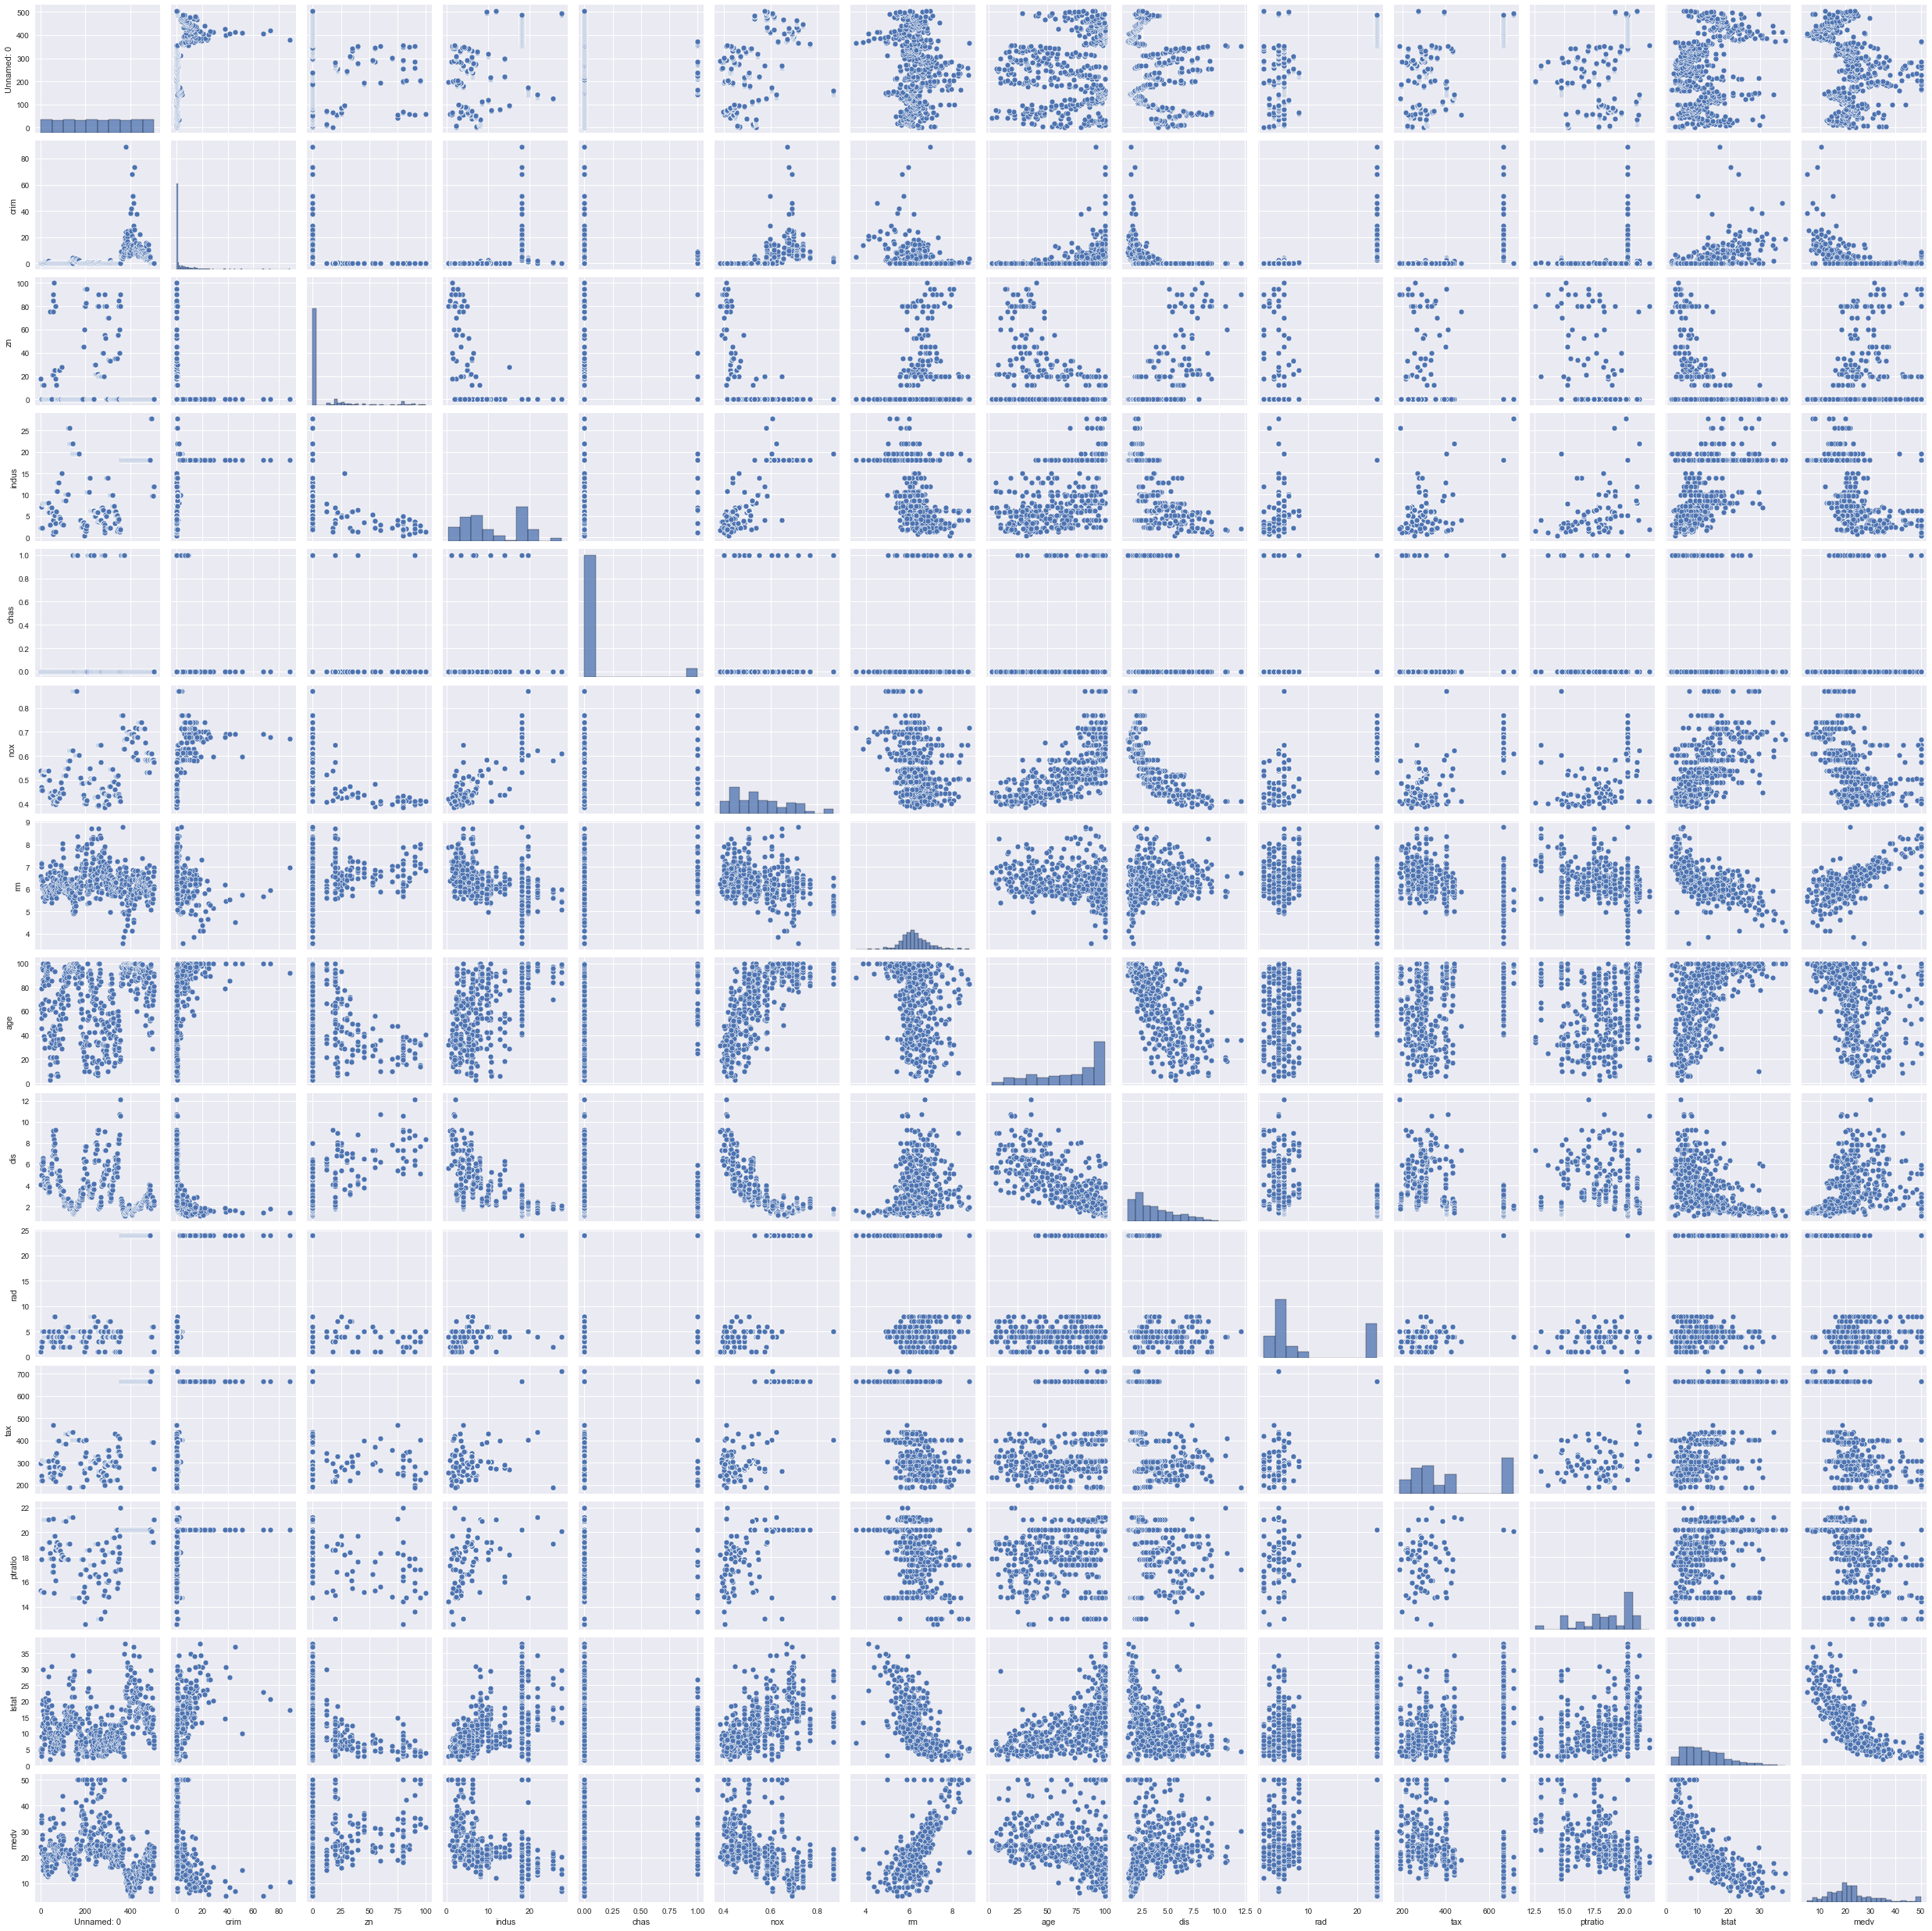

In [115]:
df = pd.read_csv('Datasets/Boston.csv')

print(df.head)

sns.pairplot(df)

In [108]:
print(df.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')


In [110]:
df.corr()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


In [114]:
print(df.sort_values('crim', ascending=False).head())

print(df.sort_values('tax', ascending=False).head())

print(df.sort_values('ptratio', ascending=False).head())

     Unnamed: 0     crim   zn  indus  chas    nox     rm    age     dis  rad  \
380         381  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24   
418         419  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24   
405         406  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24   
410         411  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24   
414         415  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24   

     tax  ptratio  lstat  medv  
380  666     20.2  17.21  10.4  
418  666     20.2  20.62   8.8  
405  666     20.2  22.98   5.0  
410  666     20.2  10.11  15.0  
414  666     20.2  36.98   7.0  
     Unnamed: 0     crim   zn  indus  chas    nox     rm   age     dis  rad  \
492         493  0.11132  0.0  27.74     0  0.609  5.983  83.5  2.1099    4   
491         492  0.10574  0.0  27.74     0  0.609  5.983  98.8  1.8681    4   
490         491  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4   
489  

In [118]:
print(f"Median ptratio is {df['ptratio'].median()}")

Median ptratio is 19.05
